Problem Statement:
For the purpose of this Project we will be creating one such Recommendation Engine from the ground-up, where every single user, based on there area of interest and ratings,would be recommended a list of movies that are best suited for them.

Dataset Information:

1.ID – Contains the separate keys for customer and movies.
2.Rating – A section contains the user ratings for all the movies.
3.Genre – Highlights the category of the movie.
4.Movie Name – Name of the movie with respect to the movie id.
Objective


Find out the list of most popular and liked genre
Create Model that finds the best suited Movie for one user in every genre.
Find what Genre Movies have received the best and worst ratings based on User Rating

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data2=pd.read_csv("movie_title1.csv")
data2

,Movie_Id,Year,Movie_Name,Genre,Ratings
0,1,2003.0,Dinosaur Planet,Action,3.4
1,2,2004.0,Isle of Man TT 2004 Review,Science Fiction,3.6
2,3,1997.0,Character,Drama,2.5
3,4,1994.0,Paula Abdul's Get Up & Dance,Comedy,2.4
4,5,2004.0,The Rise and Fall of ECW,Fantasy,2.5
...,...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,Romantic teenage drama,5.0
17766,17767,2004.0,Fidel Castro: American Experience,Comedy,4.0
17767,17768,2000.0,Epoch,Musical,3.0
17768,17769,2003.0,The Company,Musical,2.0


In [52]:
data2

,Movie_Id,Year,Movie_Name,Genre,Ratings
0,1,2003.0,Dinosaur Planet,Action,3.4
1,2,2004.0,Isle of Man TT 2004 Review,Science Fiction,3.6
2,3,1997.0,Character,Drama,2.5
3,4,1994.0,Paula Abdul's Get Up & Dance,Comedy,2.4
4,5,2004.0,The Rise and Fall of ECW,Fantasy,2.5
...,...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,Romantic teenage drama,5.0
17766,17767,2004.0,Fidel Castro: American Experience,Comedy,4.0
17767,17768,2000.0,Epoch,Musical,3.0
17768,17769,2003.0,The Company,Musical,2.0


In [50]:
data2.head()

,Movie_Id,Year,Movie_Name
0,Movie_Id,Year,Movie_Name
1,1,2003,Dinosaur Planet
2,2,2004,Isle of Man TT 2004 Review
3,3,1997,Character
4,4,1994,Paula Abdul's Get Up & Dance


In [53]:
data2.dtypes

Movie_Id        int64
Year          float64
Movie_Name     object
Genre          object
Ratings       float64
dtype: object

In [ ]:
data2.describe()

,Movie_Id,Year,Ratings
count,17770.000000,17763.000000,17770.000000
mean,8885.500000,1990.263694,3.337397
std,5129.901477,16.507891,1.172360
min,1.000000,1896.000000,1.000000
25%,4443.250000,1985.000000,2.500000
50%,8885.500000,1997.000000,3.200000
75%,13327.750000,2002.000000,4.400000
max,17770.000000,2005.000000,5.000000


In [ ]:
data2.shape

(17770, 5)

In [54]:
#get the customer count with NaN values
movie_count=data2.isnull().sum()
movie_count

Movie_Id      0
Year          7
Movie_Name    0
Genre         0
Ratings       0
dtype: int64

In [57]:
#to claculate how many customers we are having in the dataset
customer_count=data2['Movie_Id'].nunique()
customer_count

17770

In [58]:
#without NaN values
customer_count=data2['Movie_Id'].nunique()-movie_count
customer_count

Movie_Id      17770
Year          17763
Movie_Name    17770
Genre         17770
Ratings       17770
dtype: int64

In [59]:
#get the total number of ratings given by the customers
rating_count=data2['Movie_Id'].count()-movie_count
rating_count

Movie_Id      17770
Year          17763
Movie_Name    17770
Genre         17770
Ratings       17770
dtype: int64

In [ ]:
#To get the ratings column in movie_titles.csv first we should add the ratings column using this code
#As well as the same methosd is applied to genre column in movie_titles.csv file
import pandas as pd
import numpy as np

# Read the movie_title.csv file into a DataFrame
data2= pd.read_csv("movie_title.csv")

# Generate random ratings for each movie (assuming ratings are between 1 and 5)
np.random.seed(42)  # for reproducibility
data2['ratings'] = np.random.randint(1, 6, size=len(data2))

# Save the DataFrame back to a new CSV file
data2.to_csv("movie_title_with_ratings.csv", index=False)

In [60]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=data2.groupby('Ratings')['Ratings'].agg(['count'])
stars

,count
Ratings,
1.00,851
1.30,806
2.00,851
2.40,851
2.50,1702
2.70,851
2.90,851
3.00,1741
3.20,850


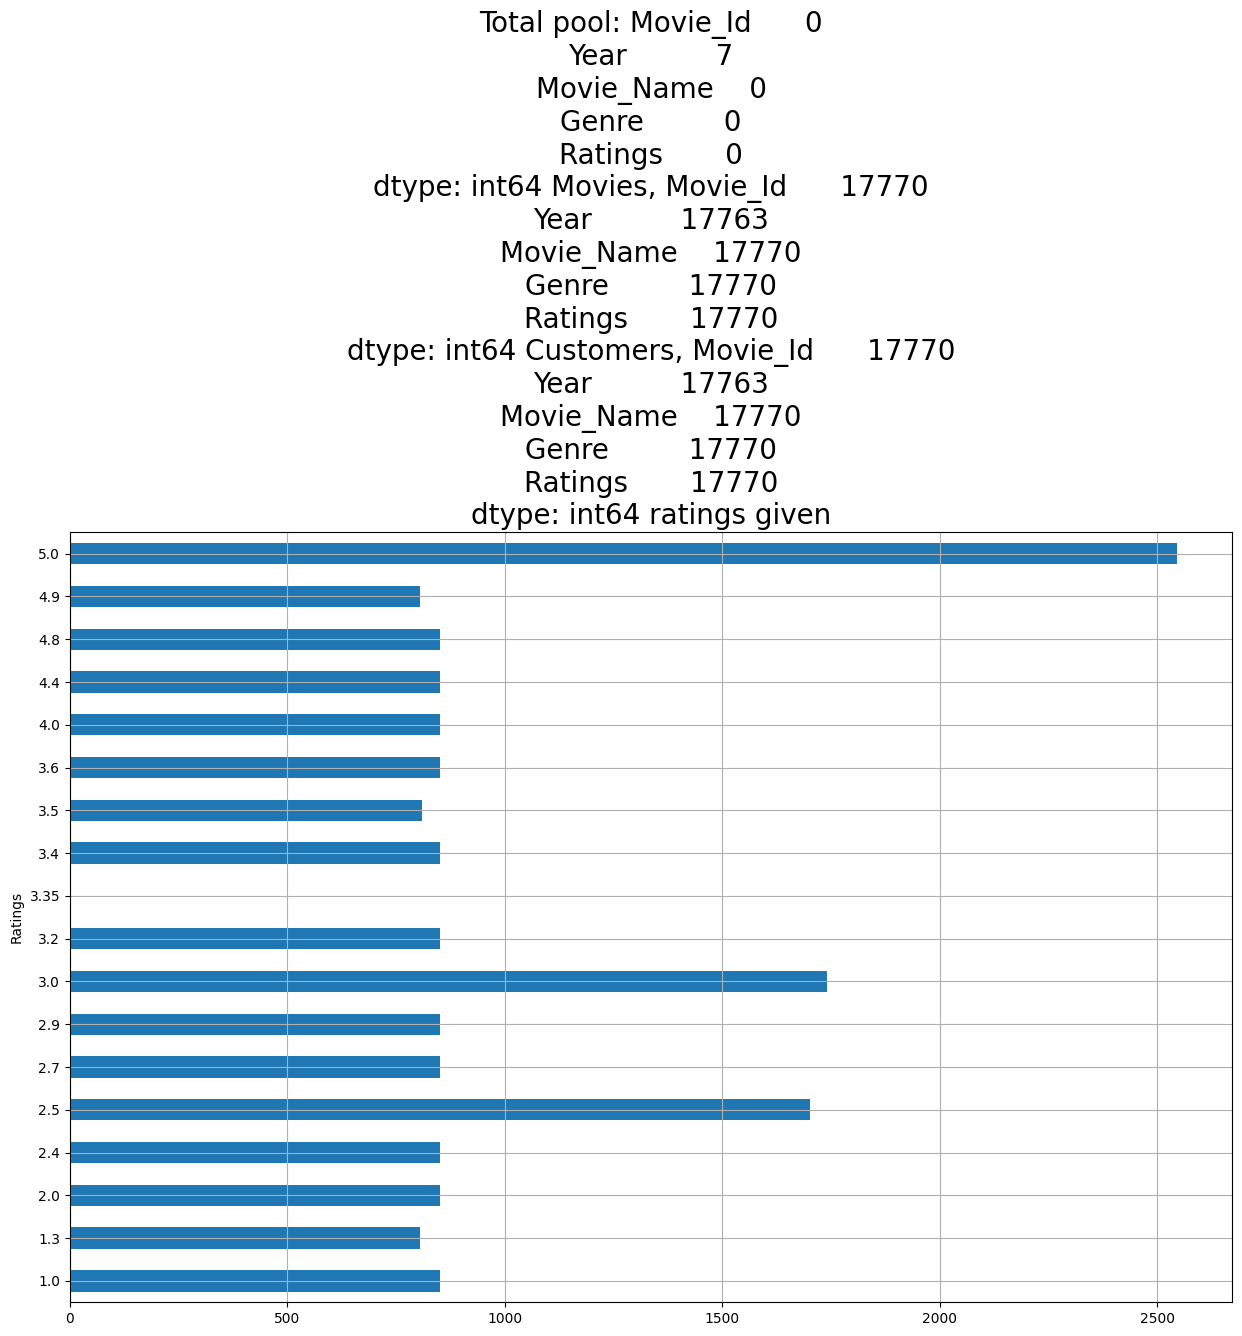

In [61]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [104]:
#To create a new column user id  in movie_title1.csv
import pandas as pd

# Read the movie_title.csv file into a DataFrame
data2 = pd.read_csv("movie_title1.csv")

# Create a new column 'user_id' with unique identifiers
# Assuming each row represents a different user, you can generate sequential user IDs starting from 1
data2['user_id'] = range(1, len(data2) + 1)

# Save the DataFrame back to a new CSV file
data2.to_csv("movie_title_with_user_id.csv", index=False)

In [98]:
!pip install pandas


In [ ]:
len(data2)

17770

The Answers for given objectives questions:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


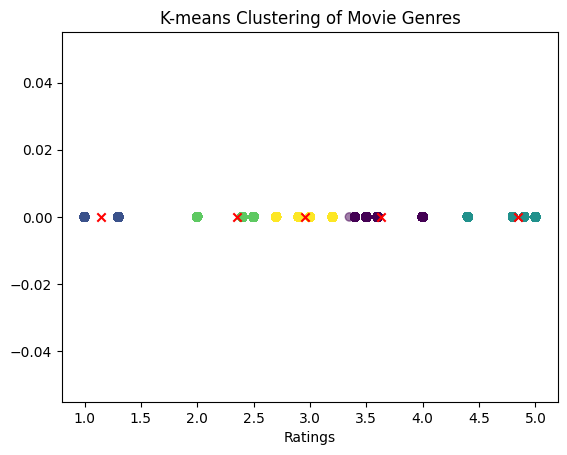

Most popular and liked genres (Cluster Centers):
2    4.849446
0    3.626442
4    2.960307
3    2.350000
1    1.145926
dtype: float64


In [ ]:
#1.Find out the list of most popular and liked genre
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a dataset with movie genres and user ratings
# Read the dataset into a DataFrame
data2 = pd.read_csv("movie_title.csv")  # Replace "movie_data.csv" with your dataset filename

# Extract features (e.g., user ratings) for clustering
features = data2[['Ratings']]

# Define the number of clusters (genres) you want to identify
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clustering results (optional)
plt.scatter(features['Ratings'], [0] * len(features), c=labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers, [0] * num_clusters, c='red', marker='x')
plt.xlabel('Ratings')
plt.title('K-means Clustering of Movie Genres')
plt.show()

# Get the cluster centers (representative ratings for each cluster)
cluster_centers = pd.Series(cluster_centers.flatten())

# Sort the cluster centers to find the most popular and liked genres
sorted_cluster_centers = cluster_centers.sort_values(ascending=False)

# Print the list of most popular and liked genres
print("Most popular and liked genres (Cluster Centers):")
print(sorted_cluster_centers)

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162988 sha256=e09168cbf0abeaf08814ddc887f6cc5f12646bffe12982030ff1baae9e8fa65a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [113]:
#2.Create Model that finds the best suited Movie for one user in every genre.
from surprise import Dataset, Reader, KNNBasic
import pandas as pd

# Load the movie ratings dataset (assuming it's in the format: userId, movieId, rating)
ratings_df = pd.read_csv("ratings.csv")  # Replace "ratings.csv" with your dataset filename

# Load the movie dataset (assuming it's in the format: movieId, title, genre)
movies_df = pd.read_csv("movies_title.csv")  # Replace "movies_title.csv" with your dataset filename

# Create the Surprise dataset from the pandas DataFrame
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'Movie_Id', 'Ratings']], reader)

# Build the collaborative filtering model (user-based collaborative filtering)
model = KNNBasic(sim_options={'user_based': True})

# Train the model on the dataset
trainset = data.build_full_trainset()
model.fit(trainset)

# Function to recommend movies for a given user in every genre
def recommend_movies_for_user_in_every_genre(user_id):
    recommended_movies = {}
    # Get unique genres
    genres = movies_df['Genre'].unique()
    for genre in genres:
        # Get all movies in the specified genre
        genre_movies = movies_df[movies_df['Genre'].str.contains(genre, case=False)]

        # Remove movies the user has already seen
        watched_movies = ratings_df[ratings_df['user_id'] == user_id]['Movie_Id']
        genre_movies = genre_movies[~genre_movies['Movie_Id'].isin(watched_movies)]

        if not genre_movies.empty:
            # Predict ratings for the remaining movies
            genre_movies['predicted_rating'] = genre_movies['Movie_Id'].apply(lambda x: model.predict(user_id, x).est)

            # Sort the movies by predicted rating
            recommended_movie = genre_movies.sort_values(by='predicted_rating', ascending=False).iloc[0]

            # Add the recommended movie to the dictionary
            recommended_movies[genre] = recommended_movie[['Movie_Name', 'predicted_rating']]

    return recommended_movies

# Sample user
user_id = 1

# Get the best-suited movie for the user in every genre
recommended_movies = recommend_movies_for_user_in_every_genre(user_id)

print(f"The best-suited movie for user {user_id} in every genre is:")
for genre, movie_info in recommended_movies.items():
    print(f"Genre: {genre}")
    print(movie_info)
    print()

Computing the msd similarity matrix...
Done computing similarity matrix.
The best-suited movie for user 1 in every genre is:
Genre: Action
Movie_Name          Neil Diamond: Greatest Hits Live
predicted_rating                            3.337397
Name: 14, dtype: object

Genre: Science Fiction
Movie_Name          Isle of Man TT 2004 Review
predicted_rating                      3.337397
Name: 1, dtype: object

Genre: Drama
Movie_Name          Character
predicted_rating     3.337397
Name: 2, dtype: object

Genre: Comedy
Movie_Name          Paula Abdul's Get Up & Dance
predicted_rating                        3.337397
Name: 3, dtype: object

Genre: Fantasy
Movie_Name          The Rise and Fall of ECW
predicted_rating                    3.337397
Name: 4, dtype: object

Genre: Documentary
Movie_Name              Sick
predicted_rating    3.337397
Name: 5, dtype: object

Genre: Thriller
Movie_Name          What the #$*! Do We Know!?
predicted_rating                      3.337397
Name: 7, dtype: 

In [119]:
#3.Find what Genre Movies have received the best and worst ratings based on User Rating.
from surprise import Dataset, Reader, KNNBasic
import pandas as pd

# Load the movie ratings dataset (assuming it's in the format: userId, movieId, rating)
ratings_df = pd.read_csv("ratings.csv")  # Replace "ratings.csv" with your dataset filename

# Load the movie dataset (assuming it's in the format: movieId, title, genre)
movies_df = pd.read_csv("movies_title.csv")  # Replace "movies_title.csv" with your dataset filename

# Create the Surprise dataset from the pandas DataFrame
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'Movie_Id', 'Ratings']], reader)

# Build the collaborative filtering model (user-based collaborative filtering)
model = KNNBasic(sim_options={'user_based': True})

# Train the model on the dataset
trainset = data.build_full_trainset()
model.fit(trainset)

# Function to get the average rating for each genre
def get_genre_ratings():
    genre_ratings = {}
    # Get unique genres
    genres = movies_df['Genre'].unique()
    for genre in genres:
        # Get all movies in the specified genre
        genre_movies = movies_df[movies_df['Genre'].str.contains(genre, case=False)]

        # Get ratings for movies in the genre
        genre_ratings['Genre'] = ratings_df[ratings_df['Movie_Id'].isin(genre_movies['Movie_Id'])]['Ratings'].mean()

    return genre_ratings

# Get average ratings for each genre
genre_ratings = get_genre_ratings()

# Sort genres by ratings
sorted_genres = sorted(genre_ratings.items(), key=lambda x: x[1], reverse=True)

# Print the genre with the best rating
print("Genre with the best average rating:")
print(sorted_genres[0])

# Print the genre with the worst rating
print("Genre with the worst average rating:")
print(sorted_genres[-1])


Computing the msd similarity matrix...
Done computing similarity matrix.
Genre with the best average rating:
('Genre', 3.338152610441767)
Genre with the worst average rating:
('Genre', 3.338152610441767)
